# Import libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_iris
%matplotlib inline

In [7]:
df = pd.read_csv("loan.csv")

In [8]:
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,"$5,849.00"
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,"$6,091.00"
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,"$3,000.00"
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,"$4,941.00"
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,"$6,000.00"


# Basic stats

In [9]:
df.shape

(500, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         500 non-null    int64  
 1   Loan_ID            500 non-null    object 
 2   Gender             491 non-null    object 
 3   Married            497 non-null    object 
 4   Dependents         488 non-null    object 
 5   Education          500 non-null    object 
 6   Self_Employed      473 non-null    object 
 7   ApplicantIncome    500 non-null    int64  
 8   CoapplicantIncome  500 non-null    float64
 9   LoanAmount         482 non-null    float64
 10  Loan_Amount_Term   486 non-null    float64
 11  Credit_History     459 non-null    float64
 12  Property_Area      500 non-null    object 
 13  Loan_Status        500 non-null    object 
 14  Total_Income       500 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 58.7+ KB


In [11]:
df.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,500.000000,500.000000,500.000000,482.000000,486.000000,459.000000
mean,249.500000,5493.644000,1506.307840,144.020747,342.543210,0.843137
std,144.481833,6515.668972,2134.432188,82.344919,63.834977,0.364068
min,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000
25%,124.750000,2874.500000,0.000000,100.000000,360.000000,1.000000
50%,249.500000,3854.000000,1125.500000,126.500000,360.000000,1.000000
75%,374.250000,5764.000000,2253.250000,161.500000,360.000000,1.000000
max,499.000000,81000.000000,20000.000000,700.000000,480.000000,1.000000


In [12]:
df.isna().sum()

Unnamed: 0            0
Loan_ID               0
Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

##### Let us group the quantitative variables 'ApplicantIncome', 'Coapplicant Income', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History' by 'Loan_Status' categorical variable

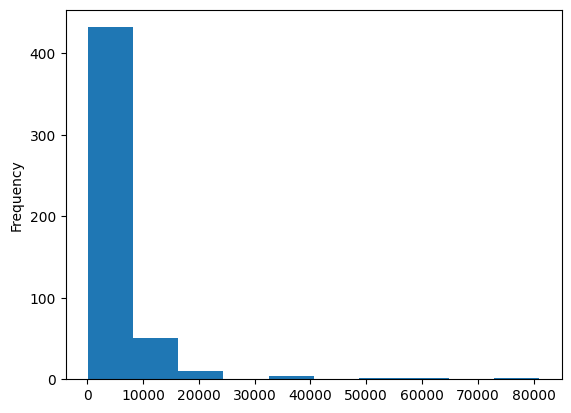

In [13]:
df["ApplicantIncome"].plot(kind="hist")
plt.show()

In [14]:
df["ApplicantIncome"].fillna(df["ApplicantIncome"].mean(), inplace=True)

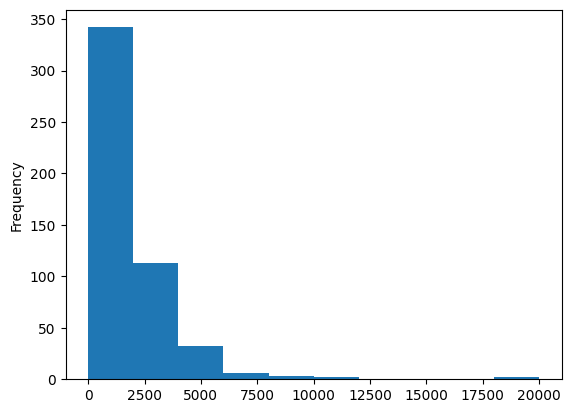

In [15]:
df["CoapplicantIncome"].plot(kind="hist")
plt.show()

In [16]:
df["CoapplicantIncome"].fillna(df["CoapplicantIncome"].mean(), inplace=True)

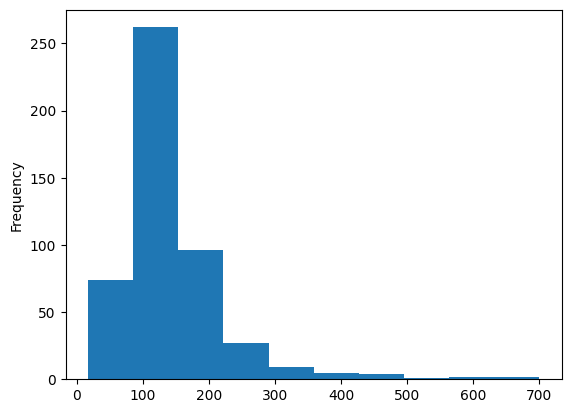

In [17]:
df["LoanAmount"].plot(kind="hist")
plt.show()

In [18]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)

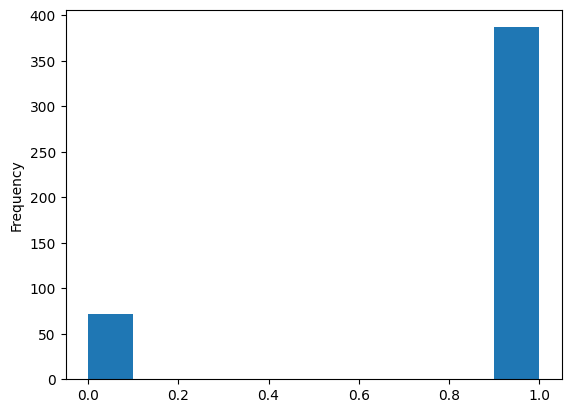

In [19]:
df["Credit_History"].plot(kind="hist")
plt.show()

In [20]:
df["Credit_History"].fillna(np.random.randint(0,2), inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

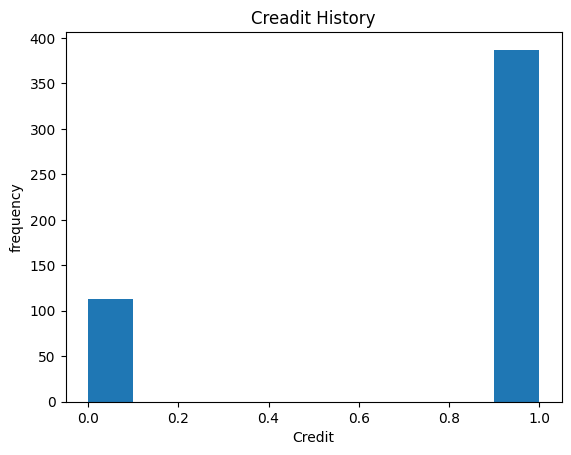

In [47]:
plt.hist(df["Credit_History"])
plt.title("Creadit History")
plt.ylabel("frequency")
plt.xlabel("Credit")
plt.show

# Stats of the grouped data

In [48]:
grouped_df = df[["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Credit_History"]].groupby(df["Loan_Status"])

In [51]:
grouped_df.head

<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001B79FDA11D0>>

In [52]:
mean = grouped_df.mean()
mean

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Status,,,,
N,5773.83871,1520.064516,153.343006,0.516129
Y,5367.75942,1500.127304,139.832485,0.889855


In [24]:
median = grouped_df.median()
median

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Status,,,,
N,3992.0,0.0,134.0,1.0
Y,3813.0,1210.0,126.0,1.0


In [25]:
min = grouped_df.min()
min

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Status,,,,
N,150,0.0,35.0,0.0
Y,210,0.0,17.0,0.0


In [26]:
max = grouped_df.max()
max

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Status,,,,
N,81000,20000.0,570.0,1.0
Y,63337,20000.0,700.0,1.0


In [27]:
std = grouped_df.std()
std

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Status,,,,
N,7490.712530,2467.616395,86.885795,0.501360
Y,6034.258256,1970.403059,77.748476,0.313525


# Iris dataset

In [28]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [29]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df["label"] = iris.target

In [30]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

0 -> setosa <br>
1 -> versicolor <br>
2 -> virginica

In [31]:
iris_df.shape

(150, 5)

In [32]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Basic stats

In [33]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [34]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Setosa stats

In [35]:
setosa = iris_df[iris_df["label"] == 0].drop("label", axis=1)

In [36]:
setosa.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


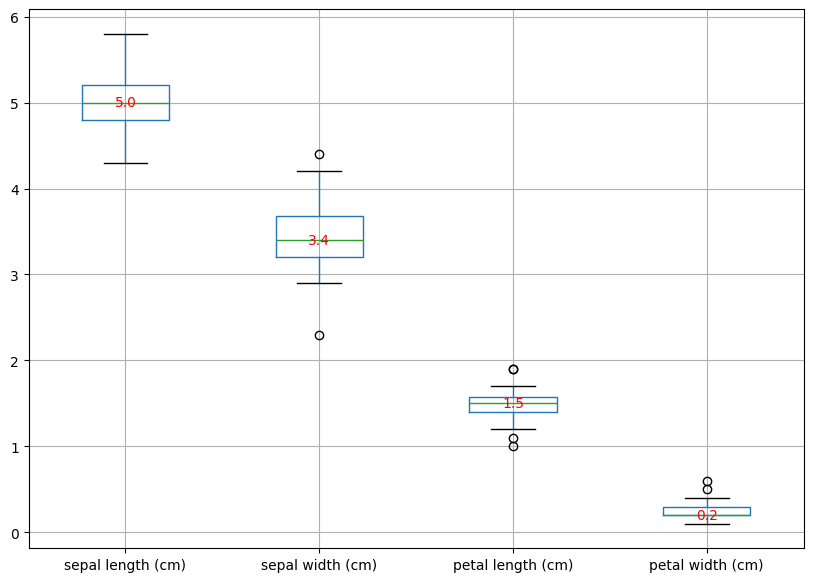

In [37]:
plt.figure(figsize=(10,7))
box = setosa.boxplot()
medians = setosa.median()
for i in range(len(medians)):
    box.annotate(medians[i], (i+1, medians[i]), ha="center", va="center", color="red", size=10)
plt.show()

# Versicolor stats

In [57]:
versicolor = iris_df[iris_df["label"] == 1].drop("label", axis=1)

In [58]:
versicolor.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


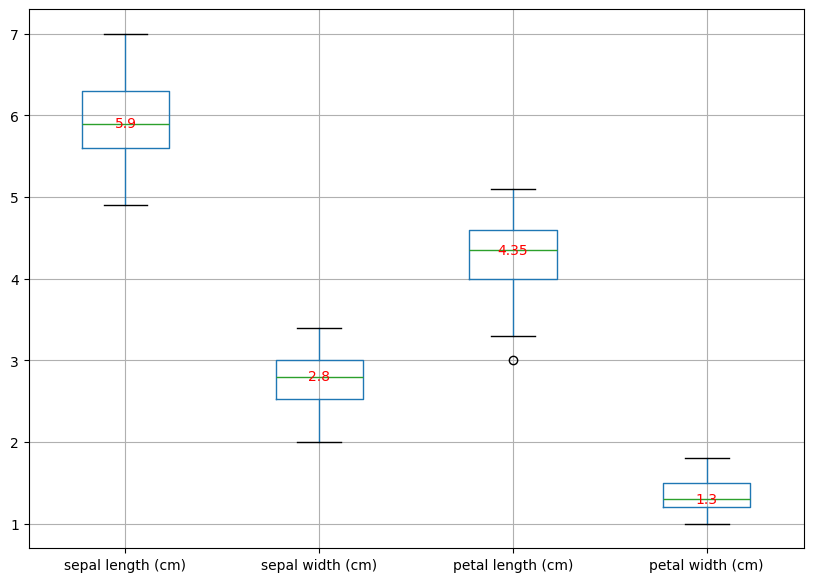

In [40]:
plt.figure(figsize=(10,7))
box = versicolor.boxplot()
medians = versicolor.median()
for i in range(len(medians)):
    box.annotate(medians[i], (i+1, medians[i]), ha="center", va="center", color="red", size=10)
plt.show()

# Virginica stats

In [41]:
virginica = iris_df[iris_df["label"] == 2].drop("label", axis=1)

In [42]:
virginica.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


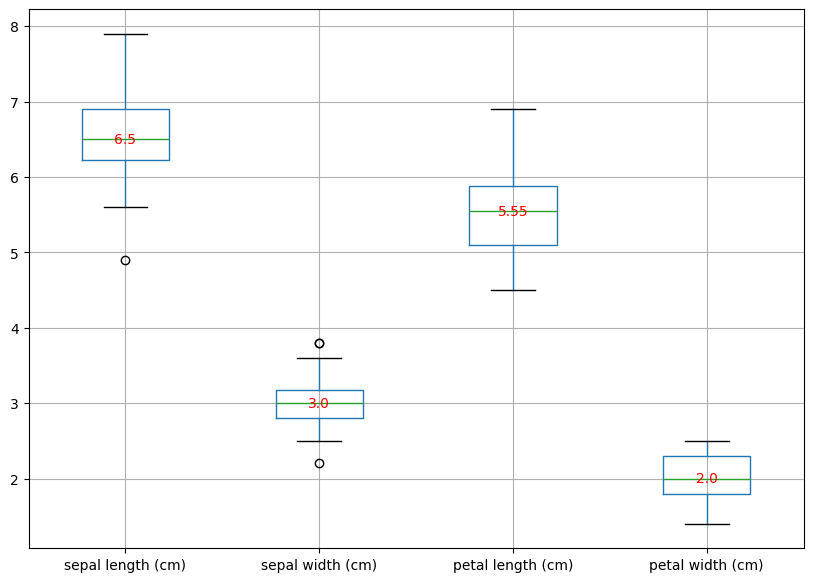

In [43]:
plt.figure(figsize=(10,7))
box = virginica.boxplot()
medians = virginica.median()
for i in range(len(medians)):
    box.annotate(medians[i], (i+1, medians[i]), ha="center", va="center", color="red", size=10)
plt.show()